In [ ]:
'''
Em caso de dúvidas ou problemas, solicitamos, por gentileza, entrar em contato pelo e-mail:
python.economia@gmail.com


Problema sugerido
Continuamos com os dados populacionais de altura da população adulta de uma determinada cidade (Arquivo 30.xlsx). 
Considere o seguinte experimento:
Selecionar uma amostra aleatória de tamanho n

No exercício Ex_4_1, vimos que para n = 35, a probabilidade de obtermos uma altura média entre 1.69 e 1.71 metro é de 67,45%.
No exercício Ex_4_2, vimos que para n = 80, a probabilidade de obtermos uma altura média entre 1.69 e 1.71 metro é de 86,28%.

Sendo a média populacional igual 1.70 metro, a maior probabilidade de obter uma média entre 1.69 e 1.71 metro para o tamanho
da amostra igual a 80 já era esperada?
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados_populacionais = pd.read_excel('Arquivo 30.xlsx')

In [3]:
dados_populacionais.head()

,altura_metros
0,1.74
1,1.77
2,1.76
3,1.67
4,1.71


In [4]:
E_media_amostral = dados_populacionais['altura_metros'].mean()
σ = dados_populacionais['altura_metros'].std(ddof=0)

In [5]:
# Erro padrão da distribuição da média amostral para n = 35
n_1 = 35

sigma_x_barra = σ / np.sqrt(n_1)
sigma_x_barra

0.01017049250633578

In [6]:
# Erro padrão da distribuição da média amostral para n = 80
n_2 = 80

sigma_x_barra = σ / np.sqrt(n_2)
sigma_x_barra

0.0067271484707026215

---

In [7]:
# Gera 10 mil amostras diferentes de tamanho 35
q = 10_000     # número de amostras diferentes a serem geradas

amostras_35 = list()

while len(amostras_35) < q:
    amostra = set(np.random.choice(dados_populacionais.index, size=n_1, replace=False))  # n_1 = 35 (tamanho da amostra)
    if amostra not in amostras_35:
        amostras_35.append(amostra)

In [8]:
# Calcula a média para cada uma das 10 mil amostras que obtivemos para n = 35
medias_amostras_35 = list()
for amostra in amostras_35:
    alturas_amostra = dados_populacionais.loc[amostra]
    media_alturas = alturas_amostra.mean()
    medias_amostras_35.append(float(media_alturas))

In [9]:
# Gera 10 mil amostras diferentes de tamanho 80
q = 10_000     # número de amostras diferentes a serem geradas
amostras_80 = list()

while len(amostras_80) < q:
    amostra = set(np.random.choice(dados_populacionais.index, size=n_2, replace=False)) # n_2 = 80 (tamanho da amostra)
    if amostra not in amostras_80:
        amostras_80.append(amostra)

In [10]:
# Calcula a média para cada uma das 10 mil amostras que obtivemos para n = 80
medias_amostras_80 = list()
for amostra in amostras_80:
    alturas_amostra = dados_populacionais.loc[amostra]
    media_alturas = alturas_amostra.mean()
    medias_amostras_80.append(float(media_alturas))

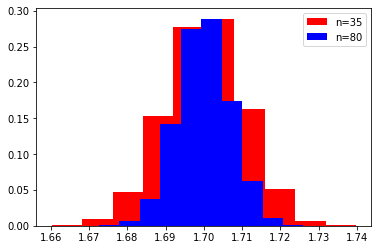

In [11]:
plt.hist(medias_amostras_35, 
         weights=[1/len(medias_amostras_35)] * len(medias_amostras_35),  # Necessário para frequência relativa 
         color='red', 
         label='n=35')
plt.hist(medias_amostras_80, 
         weights=[1/len(medias_amostras_80)] * len(medias_amostras_80),
         color='blue', 
         label='n=80')
plt.legend()
plt.show()

In [ ]:
'''
O erro padrão da média amostral (sigma_x_barra) é calculado pela seguinte fórmula:

sigma_x_barra = σ / (n ** 0.5)               (em que: σ é o desvio padrão dos dados populacionais
                                                      n é o tamanho da amostra
                                                      n ** 0.5 é a raiz quadrada de n)

Podemos ver que quando aumentamos o tamanho da amostra, o erro padrão da média amostral diminui. Um menor erro padrão significa
um gráfico mais "fino", com uma concentração maior das possíveis médias amostrais mais próxima da média populacional.
Para n=35, temos um erro padrão de 0.01017.
Para n=80, temos um erro padrão de 0.0067
Observe que o histograma de frequência relativa azul, construído com as 10 mil médias para amostras de tamanho 80, possui uma
maior concentração de dados próximos à média populacional (1.70) enquanto o histograma vermelho possui um maior espalhamento
dos dados, com uma maior proporção de dados nas caudas (longe da média populacional de 1.70).
Assim, amostras maiores tendem a produzir estimativas mais próximas da média populacional (a média amostral é um estimador 
consistente da média populacional).
Podemos concluir que, para uma amostra de tamanho 80, já poderíamos esperar obter uma maior probabilidade de que a média 
amostral esteja dentro de uma determinada distância da média populacional (em relação a uma amostra de tamanho 35).
'''

In [ ]:
'''
Nota
Pudemos ver que se aumentamos o tamanho da nossa amostra, com tudo mais constante, a probabilidade de obtermos uma média
amostral muito afastada da verdadeira média populacional (que, nas aplicações, queremos estimar) diminui.  
Naturalmente, isto só vale nas aplicações se escolhermos nossa única amostra através de algum processo de amostragem criterioso
(como a "amostragem aleatória simples" em que cada possível amostra de tamanho n tenha a mesma probabilidade de ser
selecionada). Se o processo de amostragem é tal que a amostra escolhida seja viesada, mesmo que a amostra seja grande, não temos 
porque acreditar que temos uma grande probabilidade de obter uma estimativa amostral próxima do parâmetro populacional que 
estamos tentando estimar. 
'''